In [56]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import  RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [57]:
df = pd.read_csv("./heart.csv")

In [58]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [59]:
df.isna().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [60]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [61]:
#one hot encoding for categorical columns 
df['vessels_colored_by_flourosopy'] =df['vessels_colored_by_flourosopy'].map({
    'Zero':0,
    'One':1,
    'Two':2,
    'Three':3,
    'Four':4
})

df['exercise_induced_angina']=df['exercise_induced_angina'].map({'Yes':1,'No':0})
cols=['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','slope','thalassemia','vessels_colored_by_flourosopy','exercise_induced_angina']
df_encoded=pd.get_dummies(df,columns=cols,drop_first=True)
print(df_encoded.head())
print(df_encoded.columns) 


   age  resting_blood_pressure  cholestoral  Max_heart_rate  oldpeak  target  \
0   52                     125          212             168      1.0       0   
1   53                     140          203             155      3.1       0   
2   70                     145          174             125      2.6       0   
3   61                     148          203             161      0.0       0   
4   62                     138          294             106      1.9       0   

   sex_Male  chest_pain_type_Atypical angina  \
0      True                            False   
1      True                            False   
2      True                            False   
3      True                            False   
4     False                            False   

   chest_pain_type_Non-anginal pain  chest_pain_type_Typical angina  ...  \
0                             False                            True  ...   
1                             False                            True  ...   
2 

In [62]:
#standardScaler 
X= df_encoded.drop('target',axis=1)
y= df_encoded['target']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
print(df.head())
print(y.shape)
print(y.value_counts()) 



   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

   exercise_induced_angina  oldpeak        slope  \
0                        0      1.0  Downsloping   
1                        1      3.1    Upsloping   
2       

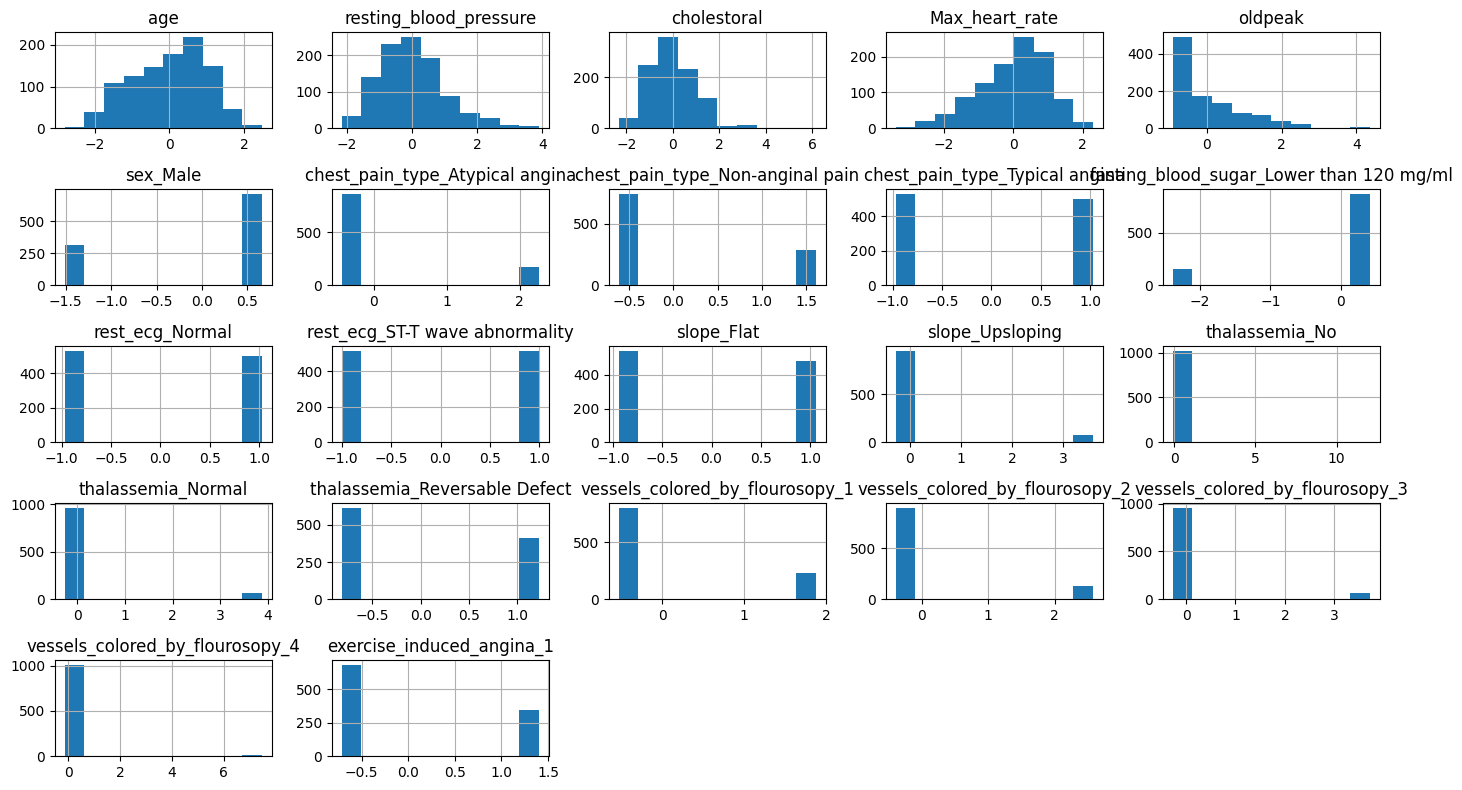

In [63]:
#EDA 
#convert x_Sclaed back to dataframe 
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)

# from scipy.stats import zscore

# z_scores = X_scaled_df.apply(zscore)
# outliers = (z_scores.abs() > 3).sum()
# print(outliers.sort_values(ascending=False))
X_scaled_df.hist(figsize=(14,8))
plt.tight_layout()
plt.show()

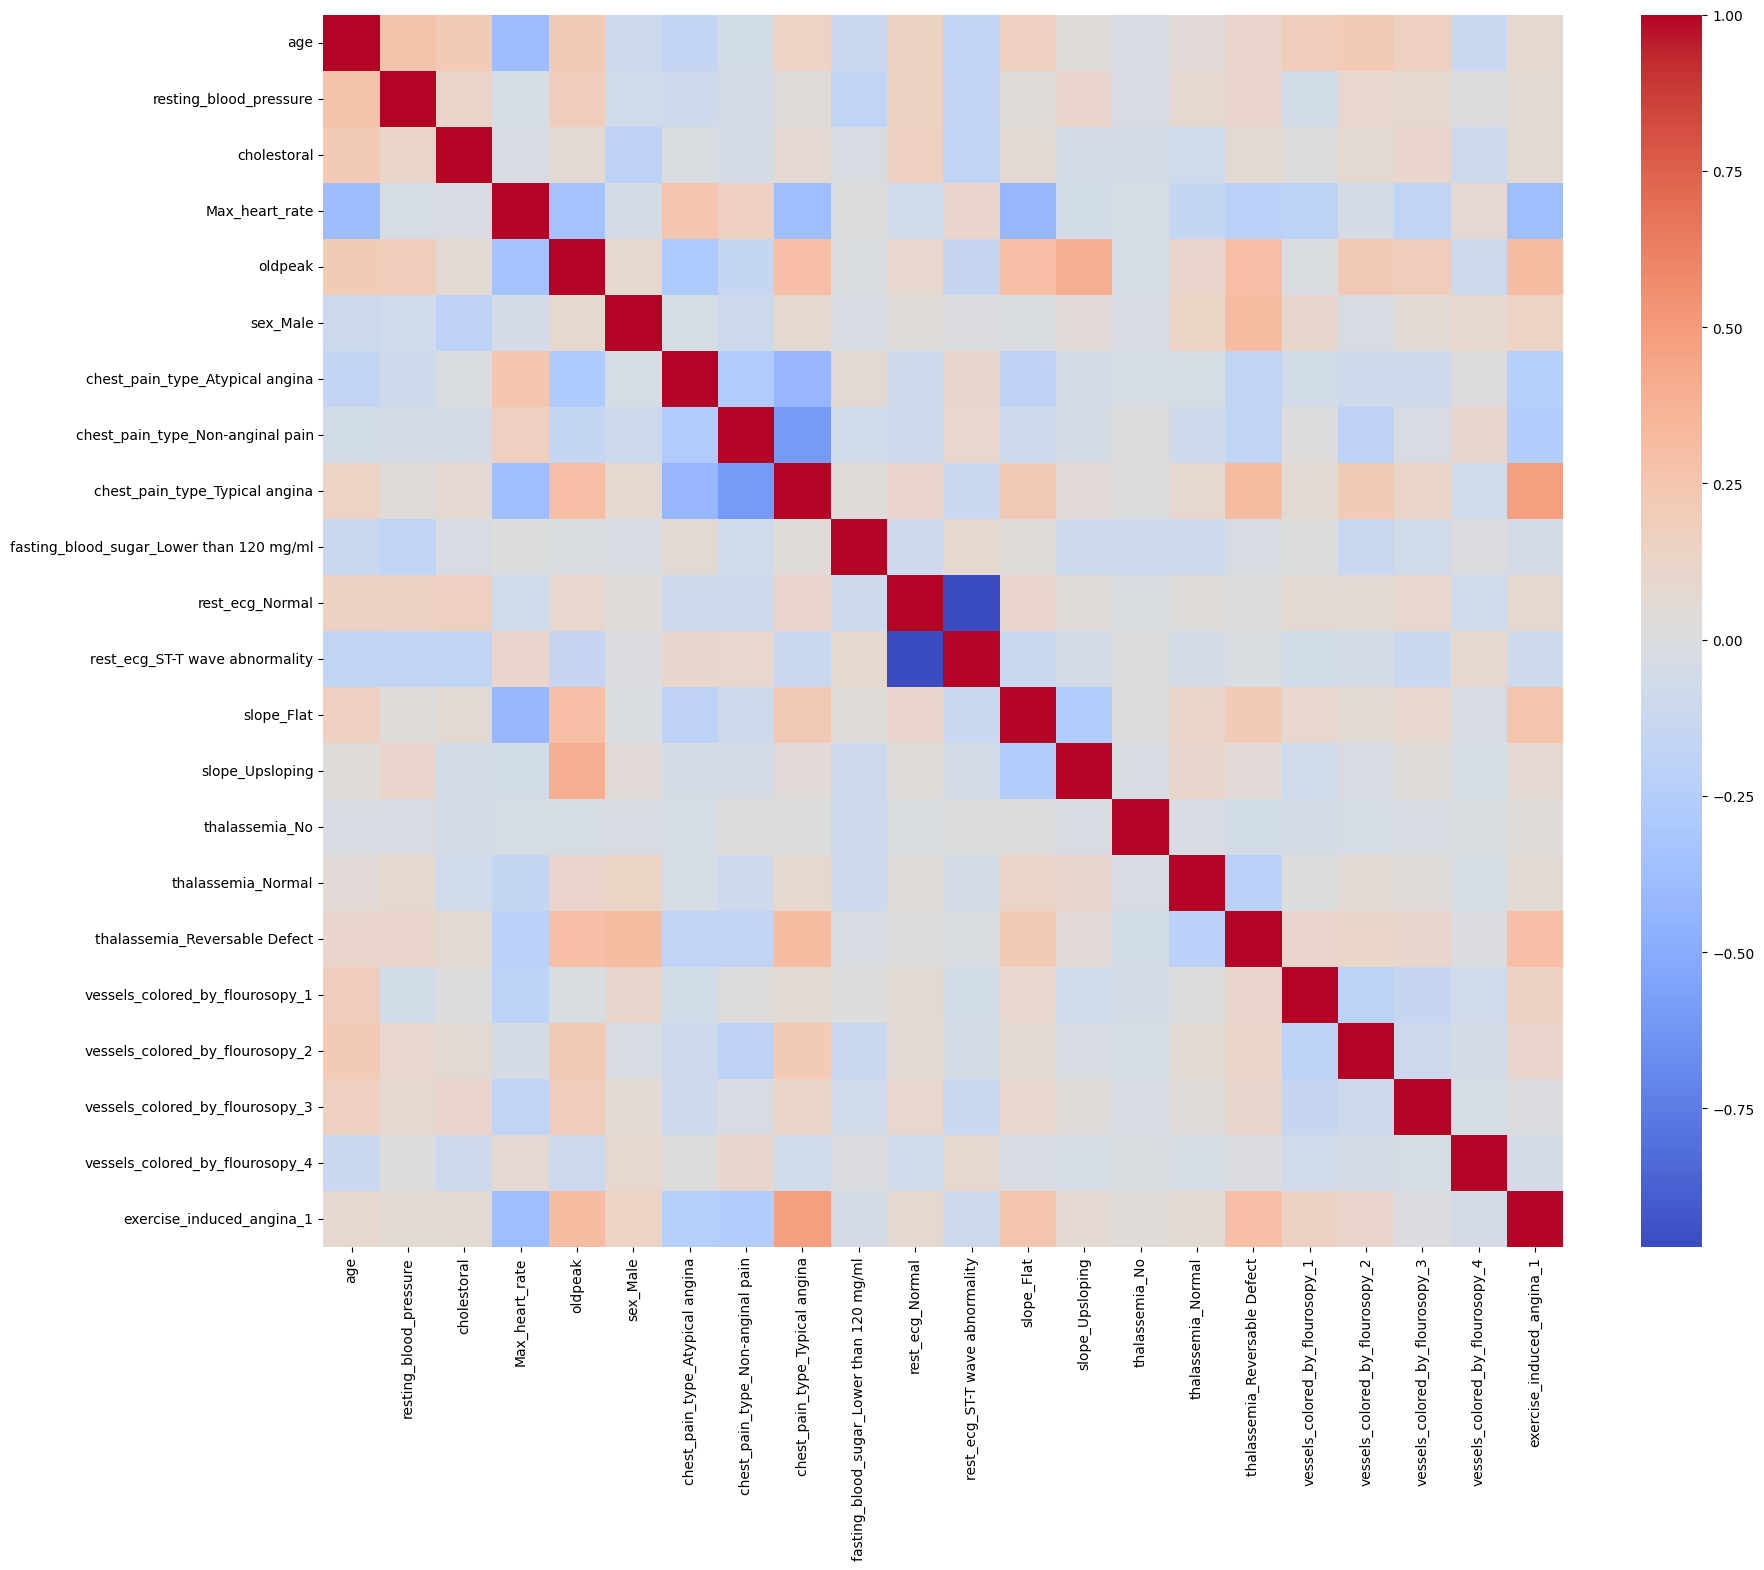

In [64]:
plt.figure(figsize=(20, 16))
sns.heatmap(X_scaled_df.corr(),cmap='coolwarm')
plt.show()


C:\Users\tasne\AppData\Local\Temp\ipykernel_23976\2500461244.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box.set_xticklabels(box.get_xticklabels(), rotation=45, ha='right')


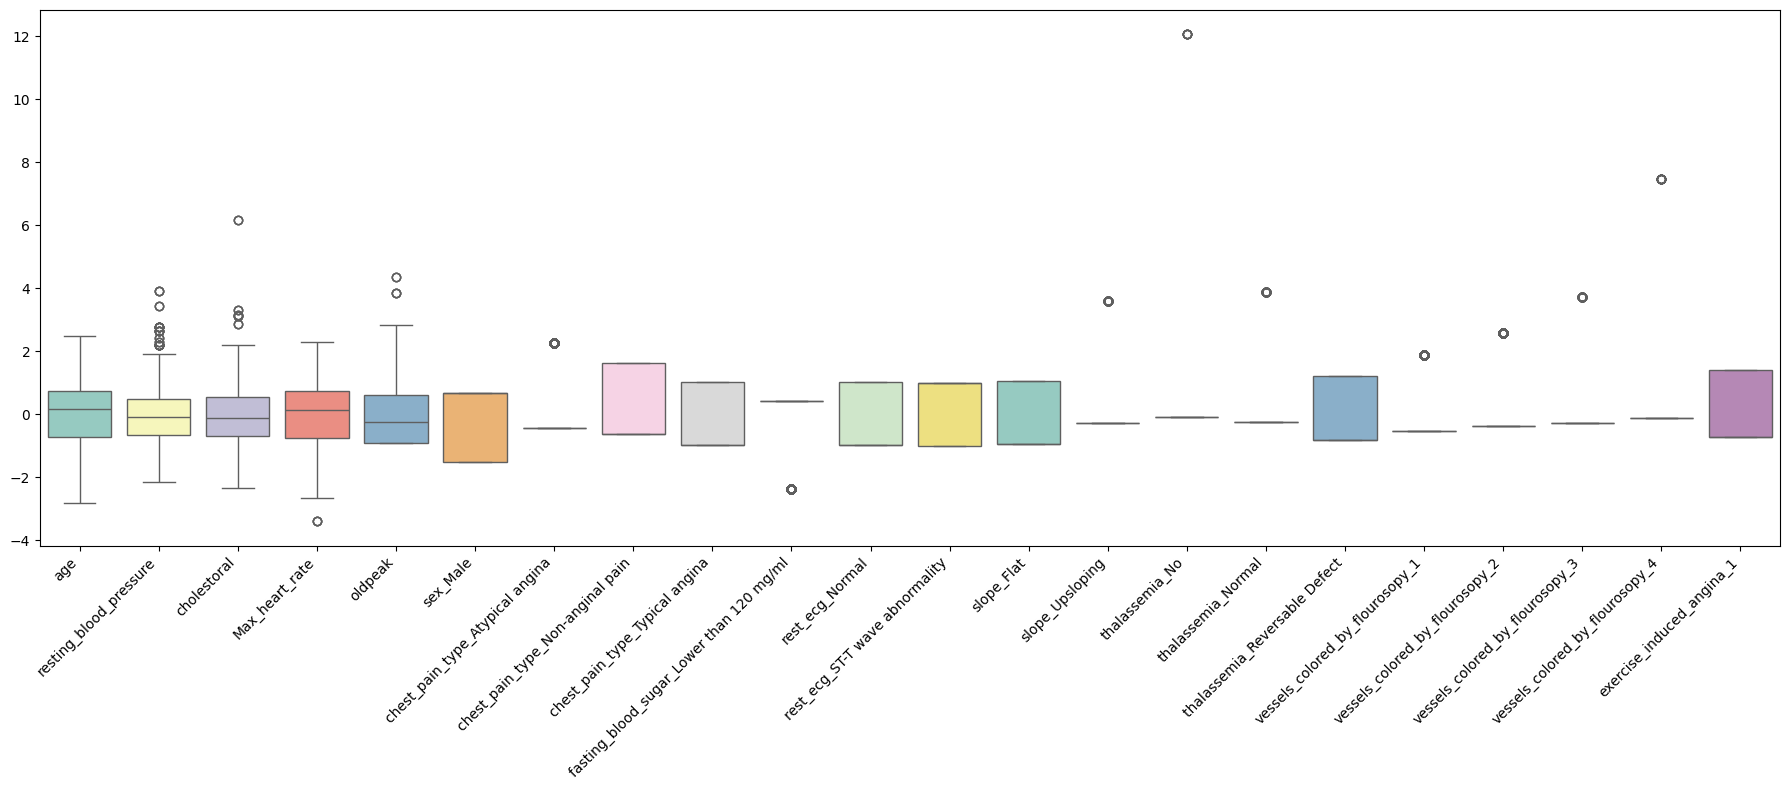

In [65]:
# Set style
plt.figure(figsize=(18, 8))

# Create boxplot
box = sns.boxplot(data=X_scaled_df, palette='Set3')
box.set_xticklabels(box.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [66]:
#PCA
pca=PCA(n_components=0.95) #keep 95% of variance 
pca_data=pca.fit_transform(X_scaled_df)

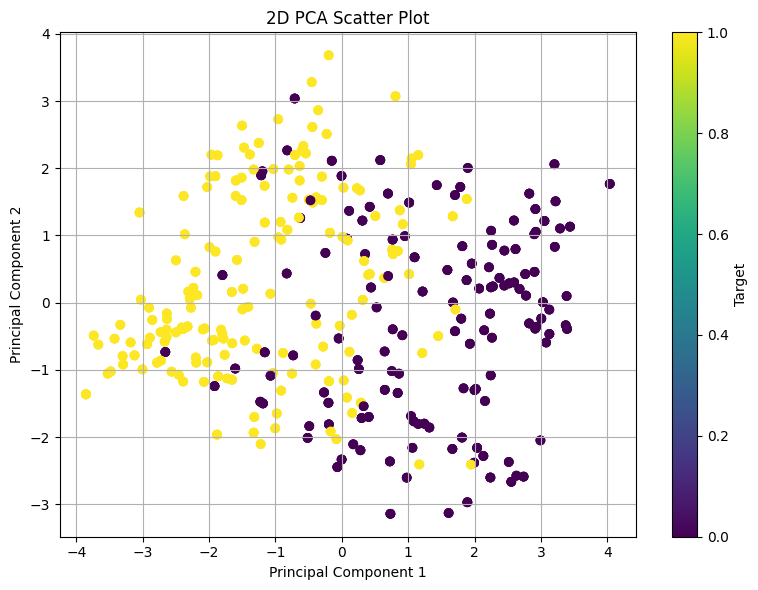

In [67]:
plt.figure(figsize=(8, 6))
scatter=plt.scatter(pca_data[:,0],pca_data[:,1],c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Scatter Plot')
plt.grid(True)
plt.colorbar(scatter, label='Target')
plt.tight_layout()
plt.show()

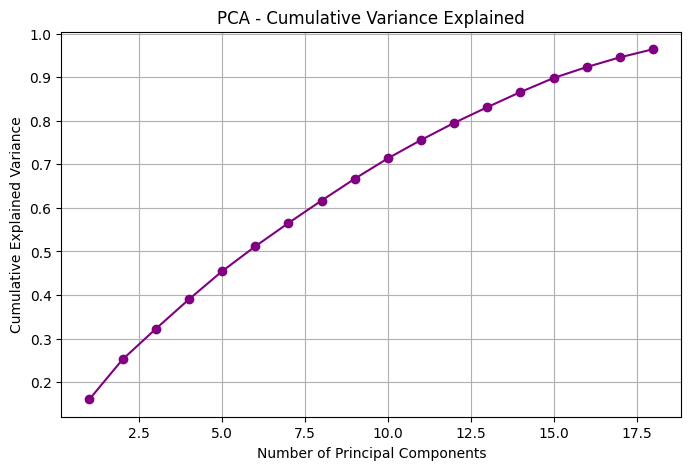

In [68]:
cummulative=pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8,5))
plt.plot(range(1,len(cummulative)+1),cummulative,marker='o',color='purple')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [69]:
#random forest
random_forest=RandomForestClassifier(n_estimators=100,random_state=42)
random_forest.fit(X_scaled,y)
rf_importance=pd.Series(random_forest.feature_importances_,index=X.columns)
rf_importance = rf_importance.sort_values(ascending=False)
print(rf_importance)

oldpeak                                     0.121922
chest_pain_type_Typical angina              0.114399
Max_heart_rate                              0.113452
thalassemia_Reversable Defect               0.099748
age                                         0.094007
cholestoral                                 0.079559
resting_blood_pressure                      0.072267
exercise_induced_angina_1                   0.066194
sex_Male                                    0.038236
slope_Flat                                  0.037762
vessels_colored_by_flourosopy_1             0.035126
chest_pain_type_Non-anginal pain            0.024769
vessels_colored_by_flourosopy_2             0.022408
rest_ecg_ST-T wave abnormality              0.015675
rest_ecg_Normal                             0.013561
vessels_colored_by_flourosopy_3             0.012852
fasting_blood_sugar_Lower than 120 mg/ml    0.011531
chest_pain_type_Atypical angina             0.010204
thalassemia_Normal                          0.

In [70]:
#RFE
selector=RFE(random_forest,n_features_to_select=10 )
selector=selector.fit(X_scaled,y)
selected_features=X.columns[selector.support_]
print(selected_features)


Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak', 'sex_Male', 'chest_pain_type_Typical angina', 'slope_Flat',
       'thalassemia_Reversable Defect', 'exercise_induced_angina_1'],
      dtype='object')


In [71]:
#Chi-Score Test 
chi_scores,p_values=chi2(X,y)
# Create results table
chi_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2': chi_scores,
    'p-value': p_values
}).sort_values('p-value')

print(chi_results)

                                     Feature        Chi2        p-value
3                             Max_heart_rate  650.008493  2.224662e-143
4                                    oldpeak  253.653461   4.149300e-57
8             chest_pain_type_Typical angina  142.563300   7.323424e-33
16             thalassemia_Reversable Defect  141.524151   1.235747e-32
21                 exercise_induced_angina_1  130.470927   3.232318e-30
2                                cholestoral  110.723364   6.803149e-26
0                                        age   81.425368   1.820066e-19
7           chest_pain_type_Non-anginal pain   75.643418   3.398067e-18
18           vessels_colored_by_flourosopy_2   68.151276   1.514215e-16
12                                slope_Flat   66.295938   3.880576e-16
6            chest_pain_type_Atypical angina   55.917533   7.557555e-14
1                     resting_blood_pressure   45.974069   1.198287e-11
17           vessels_colored_by_flourosopy_1   44.237050   2.909

['Max_heart_rate', 'oldpeak', 'chest_pain_type_Typical angina', 'thalassemia_Reversable Defect', 'exercise_induced_angina_1', 'cholestoral']


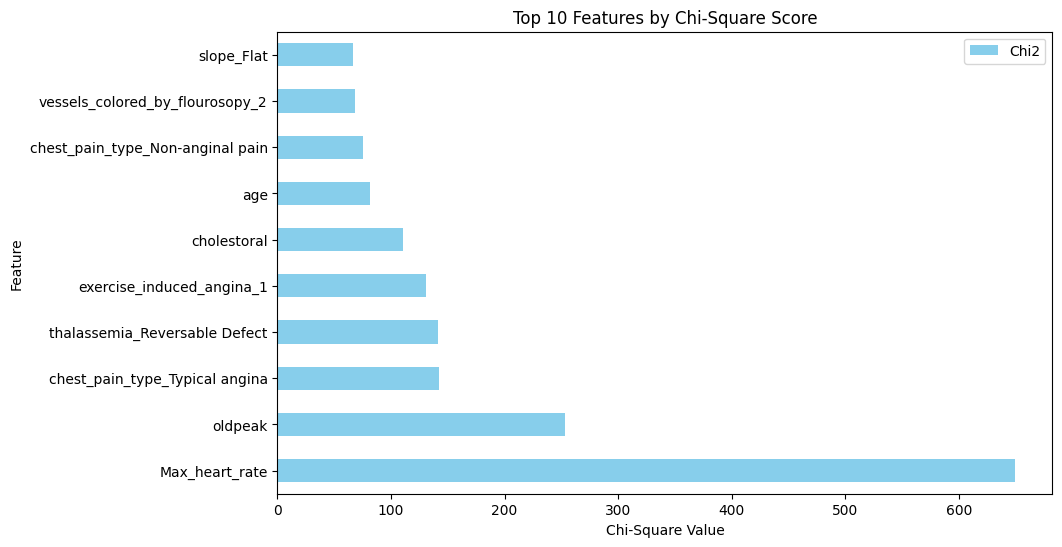

In [72]:
#select significant fetaures 
significant_features=chi_results[chi_results['Chi2']>100]['Feature'].tolist()
print(significant_features)
#horizontail bar plot 
chi_results.sort_values('Chi2', ascending=False).head(10).plot.barh(
    x='Feature', 
    y='Chi2',
    color='skyblue',
    figsize=(10,6)
)
plt.title('Top 10 Features by Chi-Square Score')
plt.xlabel('Chi-Square Value')
plt.show()


In [73]:
X_top_features = X_scaled_df[significant_features]

#split data for training and testing 
x_train, x_test, y_train, y_test=train_test_split(X_top_features,y,test_size=0.2,random_state=42,stratify=y)
print("Shapes after split:")
print(f"X_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {x_test.shape}, y_test: {y_test.shape}")


Shapes after split:
X_train: (820, 6), y_train: (820,)
X_test: (205, 6), y_test: (205,)


In [74]:
lr_model=LogisticRegression(random_state=42)
lr_model.fit(x_train,y_train)

y_pred_lr=lr_model.predict(x_test)
print(classification_report(y_test,y_pred_lr))


              precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.79      0.83      0.81       105

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



In [75]:
dt_model=DecisionTreeClassifier(max_depth=3, min_samples_split=10,random_state=42)
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       100
           1       0.78      0.75      0.77       105

    accuracy                           0.77       205
   macro avg       0.77      0.77      0.77       205
weighted avg       0.77      0.77      0.77       205



In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
rf_model=RandomForestClassifier(random_state=42)
# rf_model.fit(x_train,y_train)
# y_pred_rf=rf_model.predict(x_test)
# print(classification_report(y_test,y_pred_rf))
#tune
param_grid={
    'n_estimators':[100,150,200],
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10]
}

gridSearch=GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1, verbose=1)
gridSearch.fit(x_train,y_train)

print("best parameters",gridSearch.best_params_)
print("best cv score",gridSearch.best_score_)

best_rf=gridSearch.best_estimator_
y_pred_rf=best_rf.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
best parameters {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 150}
best cv score 0.9365853658536587
Test Accuracy: 0.926829268292683
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       100
           1       0.89      0.98      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist={
    'n_estimators':randint(100,200),
    'max_depth':randint(3,10),
    'min_samples_split':randint(2,10)
}
randomSearch=RandomizedSearchCV(estimator=rf_model,param_distributions=param_dist,n_iter=20,cv=5,scoring='accuracy',n_jobs=-1,random_state=42,verbose=1)
randomSearch.fit(x_train,y_train)

print("best parameters",randomSearch.best_params_)
print("best cv score",randomSearch.best_score_)
best_rf_random = randomSearch.best_estimator_
y_pred = best_rf_random.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best parameters {'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 191}
best cv score 0.9597560975609756
Test Accuracy: 0.9804878048780488
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       100
           1       0.96      1.00      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [78]:
import pickle

with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(best_rf_random, file)

In [79]:
svm_model=SVC(random_state=42)
svm_model.fit(x_train,y_train)
y_pred_svm=svm_model.predict(x_test)
print(classification_report(y_test,y_pred_svm))


              precision    recall  f1-score   support

           0       0.90      0.78      0.83       100
           1       0.81      0.91      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



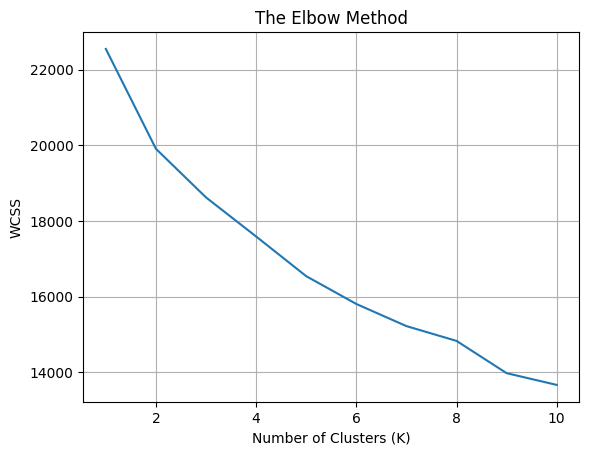

In [80]:
from sklearn.cluster import KMeans
#elbow method to know the value of k 
wcss=[]
for k in range (1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

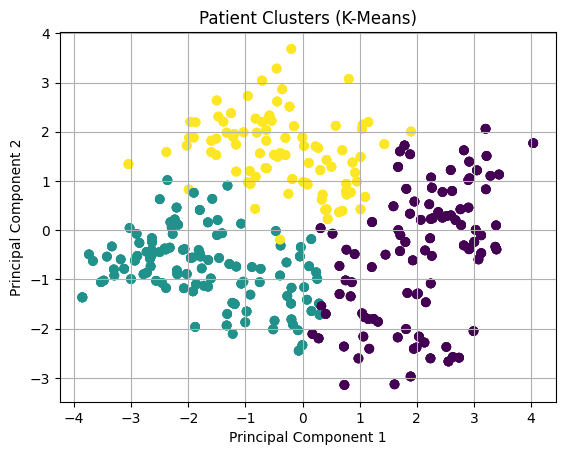

In [81]:
kmeans=KMeans(n_clusters=3,random_state=42)
clusters=kmeans.fit_predict(X_scaled_df)
plt.scatter(pca_data[:,0],pca_data[:,1],c=clusters)
plt.title('Patient Clusters (K-Means)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)